In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


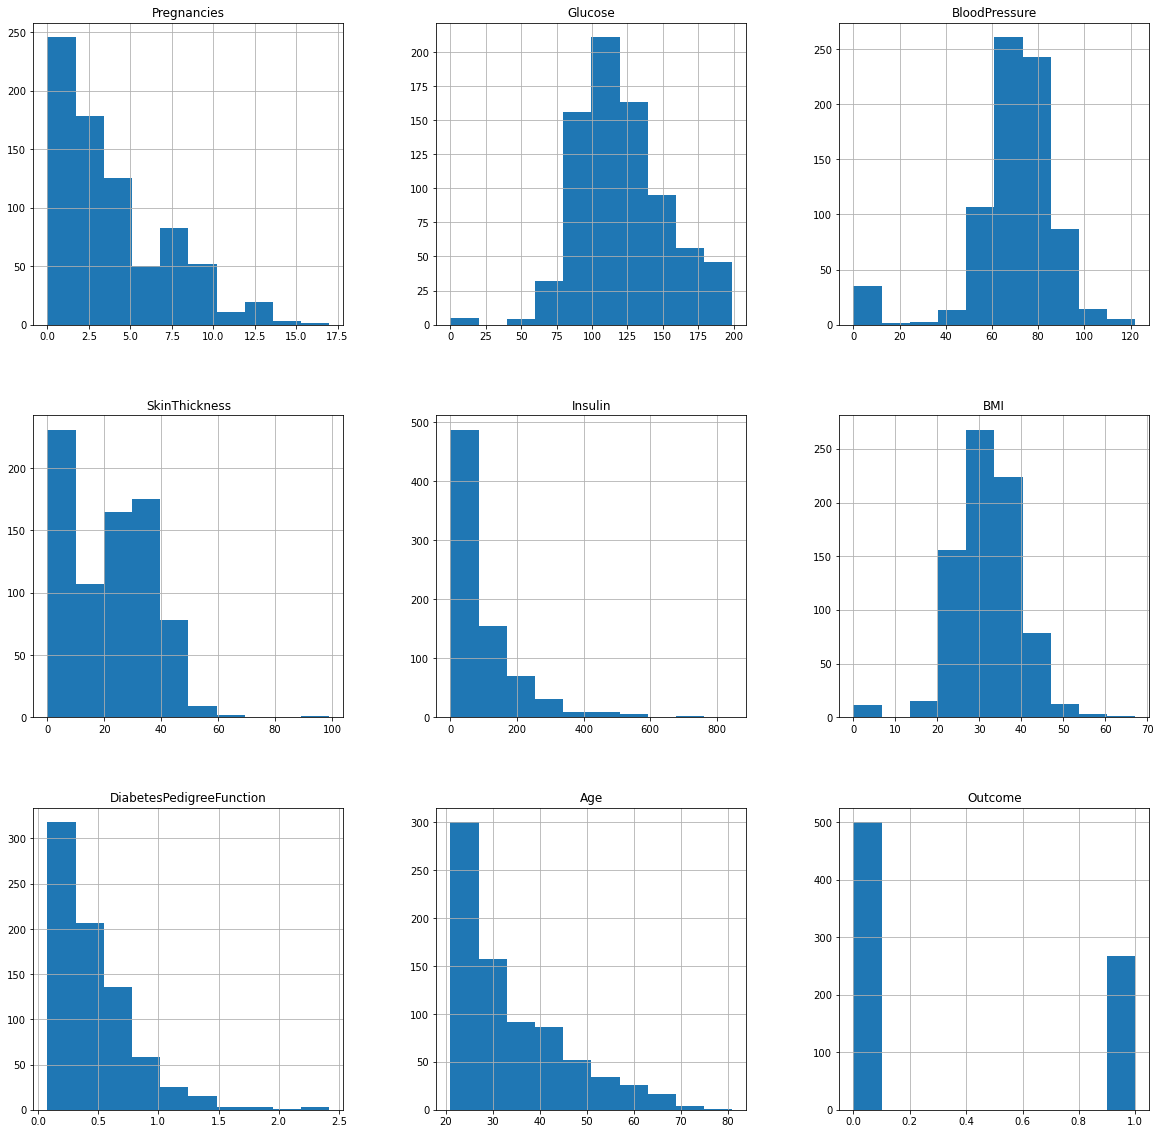

In [6]:
p = df.hist(figsize = (20,20))

### check correlation

In [7]:
df[df.columns[0:]].corr()['Outcome'][:]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

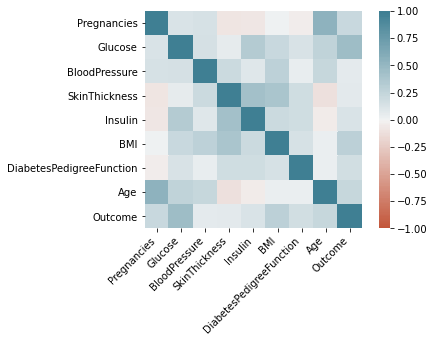

In [8]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
from sklearn.preprocessing import normalize
normalize_data = normalize(df)
nor_df = pd.DataFrame(normalize_data, columns = df.columns)


In [10]:
df_variance = nor_df.var()
df_variance

Pregnancies                 0.000439
Glucose                     0.025974
BloodPressure               0.023540
SkinThickness               0.008565
Insulin                     0.114629
BMI                         0.004020
DiabetesPedigreeFunction    0.000004
Age                         0.006551
Outcome                     0.000007
dtype: float64

### Feature selection using lasso

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [12]:
X = df.drop('Outcome',axis = 1) #features
y = df['Outcome'] #target


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [14]:
pipeline = Pipeline([('scale',StandardScaler()),('model', Lasso())])


In [15]:
search = GridSearchCV(pipeline,{'model__alpha':np.arange(0.1,10,0.1)},cv = 5, scoring="neg_mean_squared_error",verbose=3)
search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [16]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 1/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 1/5] END ...............model__alpha=0.30000000000000004; total time=   0.0s
[CV 2/5] END ...............model__alpha=0.3000

[CV 5/5] END ................model__alpha=2.3000000000000003; total time=   0.0s
[CV 1/5] END ................model__alpha=2.4000000000000004; total time=   0.0s
[CV 2/5] END ................model__alpha=2.4000000000000004; total time=   0.0s
[CV 3/5] END ................model__alpha=2.4000000000000004; total time=   0.0s
[CV 4/5] END ................model__alpha=2.4000000000000004; total time=   0.0s
[CV 5/5] END ................model__alpha=2.4000000000000004; total time=   0.0s
[CV 1/5] END ................model__alpha=2.5000000000000004; total time=   0.0s
[CV 2/5] END ................model__alpha=2.5000000000000004; total time=   0.0s
[CV 3/5] END ................model__alpha=2.5000000000000004; total time=   0.0s
[CV 4/5] END ................model__alpha=2.5000000000000004; total time=   0.0s
[CV 5/5] END ................model__alpha=2.5000000000000004; total time=   0.0s
[CV 1/5] END ...............................model__alpha=2.6; total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END ................model__alpha=4.3999999999999995; total time=   0.0s
[CV 3/5] END ................model__alpha=4.3999999999999995; total time=   0.0s
[CV 4/5] END ................model__alpha=4.3999999999999995; total time=   0.0s
[CV 5/5] END ................model__alpha=4.3999999999999995; total time=   0.0s
[CV 1/5] END ...............................model__alpha=4.5; total time=   0.0s
[CV 2/5] END ...............................model__alpha=4.5; total time=   0.0s
[CV 3/5] END ...............................model__alpha=4.5; total time=   0.0s
[CV 4/5] END ...............................model__alpha=4.5; total time=   0.0s
[CV 5/5] END ...............................model__alpha=4.5; total time=   0.0s
[CV 1/5] END ...............................model__alpha=4.6; total time=   0.0s
[CV 2/5] END ...............................model__alpha=4.6; total time=   0.0s
[CV 3/5] END ...............................model__alpha=4.6; total time=   0.0s
[CV 4/5] END ...............

[CV 4/5] END ...............................model__alpha=6.5; total time=   0.0s
[CV 5/5] END ...............................model__alpha=6.5; total time=   0.0s
[CV 1/5] END ...............................model__alpha=6.6; total time=   0.0s
[CV 2/5] END ...............................model__alpha=6.6; total time=   0.0s
[CV 3/5] END ...............................model__alpha=6.6; total time=   0.0s
[CV 4/5] END ...............................model__alpha=6.6; total time=   0.0s
[CV 5/5] END ...............................model__alpha=6.6; total time=   0.0s
[CV 1/5] END ...............................model__alpha=6.7; total time=   0.0s
[CV 2/5] END ...............................model__alpha=6.7; total time=   0.0s
[CV 3/5] END ...............................model__alpha=6.7; total time=   0.0s
[CV 4/5] END ...............................model__alpha=6.7; total time=   0.0s
[CV 5/5] END ...............................model__alpha=6.7; total time=   0.0s
[CV 1/5] END ...............

[CV 1/5] END ...............................model__alpha=8.7; total time=   0.0s
[CV 2/5] END ...............................model__alpha=8.7; total time=   0.0s
[CV 3/5] END ...............................model__alpha=8.7; total time=   0.0s
[CV 4/5] END ...............................model__alpha=8.7; total time=   0.0s
[CV 5/5] END ...............................model__alpha=8.7; total time=   0.0s
[CV 1/5] END ...............................model__alpha=8.8; total time=   0.0s
[CV 2/5] END ...............................model__alpha=8.8; total time=   0.0s
[CV 3/5] END ...............................model__alpha=8.8; total time=   0.0s
[CV 4/5] END ...............................model__alpha=8.8; total time=   0.0s
[CV 5/5] END ...............................model__alpha=8.8; total time=   0.0s
[CV 1/5] END ...............................model__alpha=8.9; total time=   0.0s
[CV 2/5] END ...............................model__alpha=8.9; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [17]:
search.best_params_

{'model__alpha': 0.1}

In [18]:
coefficient = search.best_estimator_.named_steps['model'].coef_
coefficient

array([0.        , 0.12469083, 0.        , 0.        , 0.        ,
       0.03001042, 0.        , 0.00127357])

In [19]:
X.columns[coefficient >0]

Index(['Glucose', 'BMI', 'Age'], dtype='object')

In [20]:
co_df = pd.DataFrame({X.columns[0]:coefficient[0],X.columns[1]:coefficient[1],X.columns[2]:coefficient[2],X.columns[3]:coefficient[3],X.columns[4]:coefficient[4],X.columns[5]:coefficient[5],X.columns[6]:coefficient[6],X.columns[7]:coefficient[7],}, index = ['0'])
# sns.barplot(x='Glucose', y=co_df.index,data=co_df)
co_df 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,0.124691,0.0,0.0,0.0,0.03001,0.0,0.001274


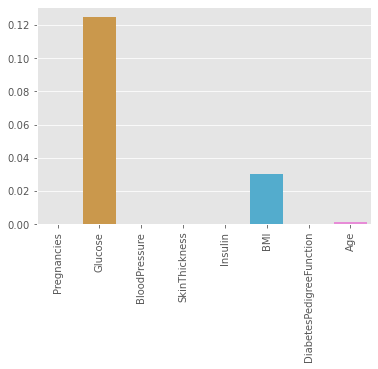

In [21]:
age_plot=sns.barplot(data=co_df,dodge=False)
plt.setp(age_plot.get_xticklabels(), rotation=90)

plt.show()

In [22]:
X.columns[coefficient  == 0]

Index(['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction'],
      dtype='object')

In [23]:
param_grid = [{'alpha' : [0.0001, 0.0005, 0.00075,
                                 0.001, 0.005, 0.0075, 
                                 0.01, 0.05, 0.075,
                                 0.1, 0.5, 0.75, 
                                 1, 5, 7.5]}]

grid = GridSearchCV(Lasso(), param_grid=param_grid,
                        cv=5, scoring='neg_mean_squared_error', 
                        return_train_score=True, n_jobs=-1)

In [24]:
grid.fit(X_train,y_train)
    
best_lasso = grid.best_estimator_

In [25]:
pred = best_lasso.predict(X_test)
pred

array([ 0.30835189,  0.27491309,  0.1916807 ,  0.1681067 ,  0.51358598,
        0.45727317, -0.16414896,  0.50294777,  0.5578446 ,  0.74480771,
        0.28294125,  0.89330096,  0.45315442,  0.28907115,  0.04866729,
        0.37013559,  0.17862786,  0.05988601,  0.76660578,  0.55557894,
        0.30903224,  0.12054116,  0.41436569,  0.14454957,  0.48419652,
        0.82605826,  0.15855495,  0.01423028,  0.34436515,  0.16632882,
        0.837682  ,  0.82068693,  0.75567313,  0.68692444,  0.5598907 ,
        0.54988407,  1.04532986,  0.31173222,  0.46684131,  0.60113247,
        0.05835944,  0.57645052,  0.52050128,  0.27877792, -0.04002737,
        0.50894475,  0.501191  ,  0.24478165,  0.35091239,  1.0064991 ,
        0.02002609,  0.57634168,  0.69465088,  0.32723445,  0.2307866 ,
       -0.02260664,  0.74920156, -0.34687074,  0.38463741,  0.71274231,
        0.6350952 ,  0.39502282,  0.35450893,  0.17626792,  0.13596413,
        0.59551116,  0.01669242,  0.68569825,  0.01898849,  0.71

In [26]:
def plot_predictions(val_target, lasso):
    line = pd.DataFrame({'x': np.arange(10.5,13.5,0.01), # small hack for a diagonal line
                         'y': np.arange(10.5,13.5,0.01)})
    plt.figure(figsize=(10,6))
    plt.scatter(val_target, lasso, label='Lasso')
    plt.plot(line.x, line.y, color='black')
    plt.xlabel('True value', fontsize=12)
    plt.ylabel('Prediction', fontsize=12)
    plt.legend()

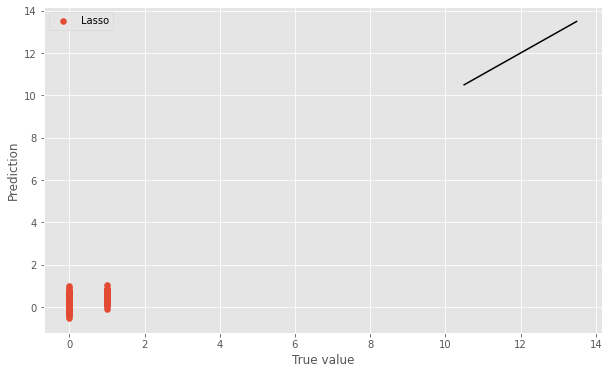

In [27]:
plot_predictions(y_test,pred)

In [28]:
df.BMI.value_counts()

32.0    13
31.2    12
31.6    12
0.0     11
33.3    10
        ..
19.3     1
49.3     1
19.4     1
20.0     1
40.1     1
Name: BMI, Length: 248, dtype: int64

### Random Forest

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix

In [30]:
forest = RandomForestClassifier(n_estimators = 10, random_state = 0) 

# fit on training data
forest.fit(X_train, y_train)

# Seeing the metrics
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.736


In [31]:
print(X_train.shape)
print(y_train.shape)

(514, 8)
(514,)


In [32]:
rf_predict = forest.predict(X_test)
print(mean_squared_error(y_test, rf_predict))
rf_predict


0.2637795275590551


array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

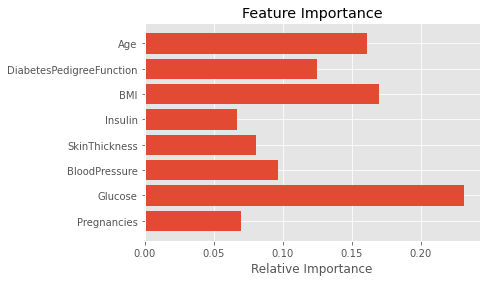

In [33]:
X_feature_impt = X_train.keys().tolist()
# type(X_feature_impt)
y_feature_impt = forest.feature_importances_


plt.barh(X_feature_impt, y_feature_impt, align='center')
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

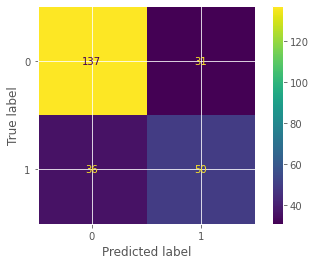

In [34]:
plot_confusion_matrix(forest, X_test, y_test)  
plt.show()

### Checking accuracy versus estimitaers

In [35]:
# Initialize the validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create lists to save the values of accuracy on training and test sets
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best CV accuracy is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best CV accuracy is 76.95% with 100 trees


In [36]:
test_acc.mean(axis = 1)

array([0.72390289, 0.73428402, 0.75901027, 0.75250828, 0.75906969,
       0.76690434, 0.76428147, 0.76949325])

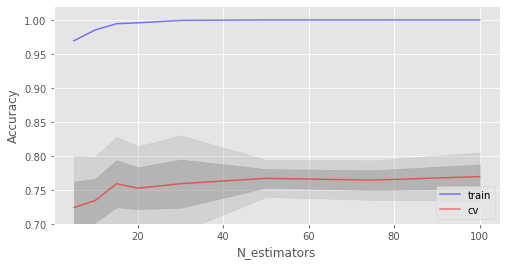

In [37]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid,test_acc.mean(axis = 1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), 
                test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), 
                test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.70,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

### Checking depth

Best CV accuracy is 76.95% with 17 max_depth


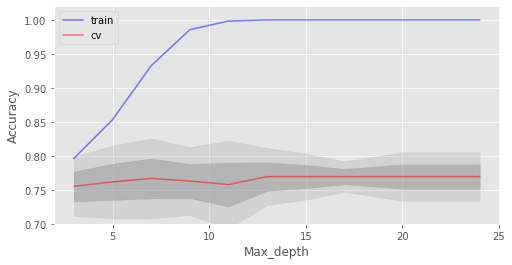

In [38]:
# Create lists to save accuracy values on the training and test sets
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best CV accuracy is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), 
                test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), 
                test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.70,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

### SVM

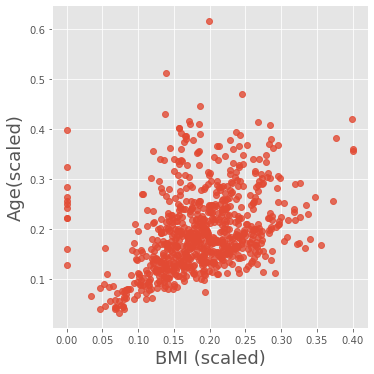

In [52]:
df_nor = normalize(df)
df_norr = pd.DataFrame(df_nor, columns = df.columns)
sns.lmplot(x='BMI',y='Age',data=df_norr, fit_reg=False, legend=False)
# plt.legend(['dibetic','non-dibetic','BMI','Glucose'], fontsize = 14)
plt.xlabel('BMI (scaled)', fontsize = 18)
plt.ylabel('Age(scaled)', fontsize = 18)
plt.show()

In [ ]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

### Linear Kernal

In [53]:
from sklearn.svm import SVC
svc = SVC(kernel = "linear") # changed to "linear"

# fit on training data
svc.fit(X_train, y_train)

# Seeing the metrics
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.779
Accuracy on test set: 0.752


### C value

In [ ]:
from sklearn.model_selection import cross_val_score

C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

In [ ]:
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

#### Polymomail Kernal

In [80]:
svc = SVC(kernel='poly', degree=2) # changed to "linear"

# fit on training data
svc.fit(X_train, y_train)

# Seeing the metrics
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.719
Accuracy on test set: 0.693


In [82]:
from sklearn.model_selection import cross_val_score
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.7669856459330144, 0.7551777170198223, 0.7551606288448395, 0.7473855092276145, 0.7552118933697882]


Text(0, 0.5, 'Cross-Validated Accuracy')

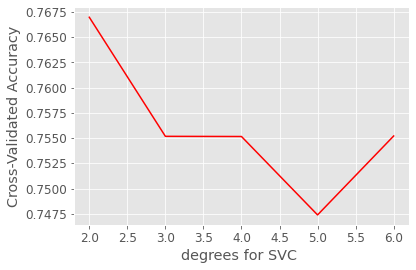

In [83]:
degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

### KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [40]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [41]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = knn.predict(X_test)

y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [43]:
train_scores = knn.score(X_train, y_train)
test_scores = knn.score(X_test, y_test)
print('Training set score: {:.4f}'. format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8211
Test set score: 0.6993


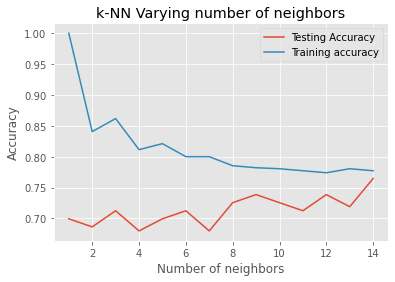

In [44]:
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    
    
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
ax.fill_between(neighbors, test_accuracy.mean() - test_accuracy.std(), 
                test_accuracy.mean() + test_accuracy.std(), color='#888888', alpha=0.4)
ax.fill_between(neighbors, test_accuracy.mean() - 2*test_accuracy.std(), 
                test_accuracy.mean() + 2*test_accuracy.std(), color='#888888', alpha=0.2)
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Text(0, 0.5, 'Error Rate')

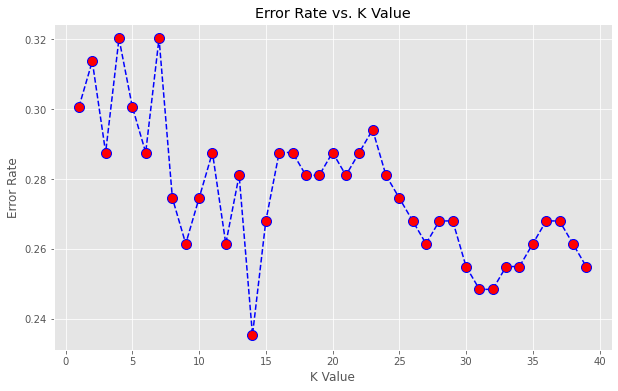

In [45]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

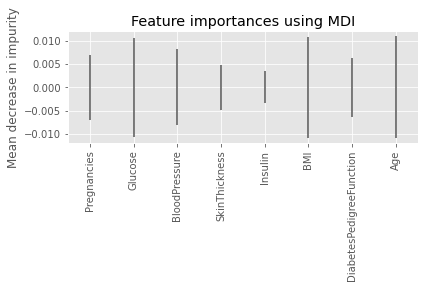

In [46]:
knn_result = permutation_importance(knn, X_train, y_train, n_repeats=11,random_state=0)
knn_result_mean = knn_result.importances_mean
knn_result_std = knn_result.importances_std

knn_importances = pd.Series(knn_result, index=X.columns)

fig, ax = plt.subplots()
knn_importances.plot.bar(yerr=knn_result_std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### ROC CURVE

In [76]:
y_pred_train_rf = forest.predict_proba(X_test)[:,1]

y_pred_train_rf

array([0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.1, 0. , 0.3, 0.2, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.3, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.3, 0.1, 0.2, 0.2, 0. , 0.2, 0. , 0. , 0.1, 0.2, 0. ,
       0. , 0.3, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. ,
       0. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ,
       0. , 0.1, 0. , 0.1, 0.1, 0. , 0. , 0.3, 0. , 0.2, 0. , 0.3, 0. ,
       0. , 0. , 0. , 0.1, 0.3, 0. , 0.1, 0. , 0. , 0. , 0. , 0.3, 0. ,
       0. , 0. , 0.3, 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.3, 0.1, 0. , 0. , 0. , 0. , 0. , 0.3, 0.2, 0.2, 0. , 0. , 0.3,
       0.3, 0.3, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.1, 0. ,
       0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0.1, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. ])

In [77]:
y_pred_train_svm = svc.predict(X_test)

y_pred_train_svm

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [78]:
y_pred_train_knn = knn.predict(X_test)

y_pred_train_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

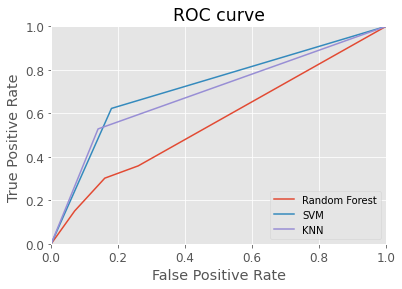

In [79]:
from sklearn.metrics import roc_curve, auc
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_train_rf)
fpr_svm, tpr_svm, thresholds_svm =roc_curve(y_test, y_pred_train_svm)
fpr_knn, tpr_knn, thresholds_knn =roc_curve(y_test, y_pred_train_knn)

plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.plot(fpr_knn, tpr_knn, label="KNN")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)